<a href="https://colab.research.google.com/github/JamesKha/mini-project4/blob/main/mini_project_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders
!pip install flask
!pip install flask_restful

# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

In [ ]:
import copy
import numpy

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import FunctionTransformer

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler,PowerTransformer
pd.options.mode.chained_assignment = None 

df = pd.read_csv("/content/drive/MyDrive/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
Loan_Status = df.loc[df['Loan_Status'] == 'Y'].sample(n=89,random_state=42)
noLoan_Status = df.loc[df['Loan_Status'] == 'N']
df = pd.concat([Loan_Status, noLoan_Status])
X,y = df.drop('Loan_Status',axis=1),df['Loan_Status']



One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [ ]:
X.isnull().sum()

Loan_ID               0
Gender                7
Married               0
Dependents            7
Education             0
Self_Employed        16
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           13
Loan_Amount_Term      7
Credit_History       21
Property_Area         0
dtype: int64

Look at some basic statistics for numerical variables.

In [ ]:
X.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,281.000000,281.000000,268.000000,274.000000,260.000000
mean,5510.113879,1892.071174,153.656716,342.043796,0.676923
std,6894.704329,3933.291696,91.884238,66.771698,0.468554
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2787.000000,0.000000,104.000000,360.000000,0.000000
50%,3617.000000,1255.000000,131.000000,360.000000,1.000000
75%,5780.000000,2426.000000,175.250000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



1.Credit History <br>
475 people have a credit history <br>
89 people do not have a credit history 

In [ ]:
X.Credit_History.value_counts()

1.0    176
0.0     84
Name: Credit_History, dtype: int64

In [ ]:
X = X.replace({'Credit_History': {1.0: 'Yes', 0.0:'No'}})

In [ ]:
X = X.drop('Loan_ID',axis=1)

In [ ]:
X.Credit_History.value_counts()

Yes    176
No      84
Name: Credit_History, dtype: int64

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [ ]:
 for i in X.iloc[:,1:].select_dtypes('object'):
   print(i,":", len(X[i].unique()))

Married : 2
Dependents : 5
Education : 2
Self_Employed : 3
Credit_History : 3
Property_Area : 3


### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



In [ ]:
X.ApplicantIncome.describe()

count      281.000000
mean      5510.113879
std       6894.704329
min        150.000000
25%       2787.000000
50%       3617.000000
75%       5780.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

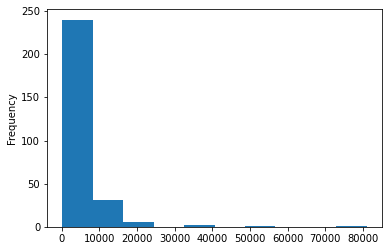

In [ ]:
X.ApplicantIncome.plot(kind="hist")


Look at box plots to understand the distributions. 

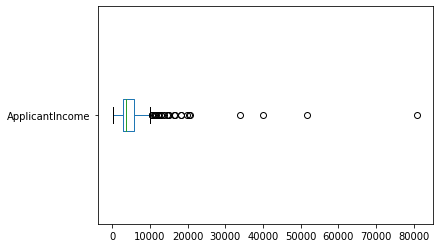

In [ ]:
X.ApplicantIncome.plot(kind="box",vert=False)

Look at the distribution of income segregated  by `Education`

Education
Graduate        AxesSubplot(0.125,0.125;0.775x0.755)
Not Graduate    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ApplicantIncome, dtype: object

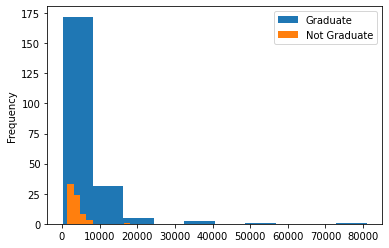

In [ ]:
X.groupby('Education').ApplicantIncome.plot(kind='hist',legend=True)

Education
Graduate        AxesSubplot(0.125,0.125;0.775x0.755)
Not Graduate    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ApplicantIncome, dtype: object

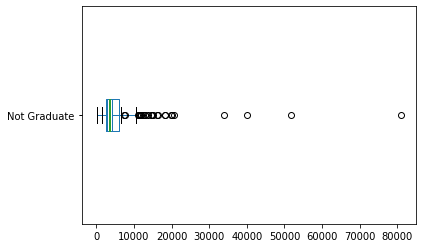

In [ ]:
df.groupby('Education').ApplicantIncome.plot(kind="box",vert=False)

Look at the histogram and boxplot of LoanAmount

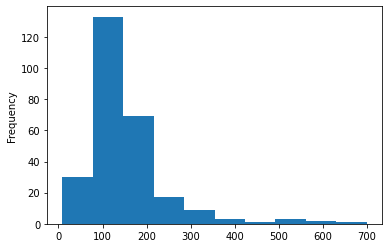

In [ ]:
X.LoanAmount.plot(kind='hist')

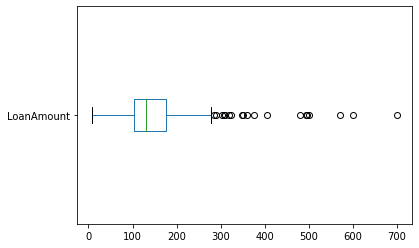

In [ ]:
X.LoanAmount.plot(kind='box',vert=False)

In [ ]:
X.select_dtypes('object')

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
217,Male,Yes,0,Graduate,No,Yes,Semiurban
485,Male,Yes,1,Not Graduate,No,Yes,Rural
261,Male,No,0,Graduate,No,Yes,Semiurban
537,Male,No,2,Graduate,No,Yes,Semiurban
609,Female,No,0,Graduate,No,Yes,Rural
...,...,...,...,...,...,...,...
596,Male,Yes,2,Not Graduate,Yes,Yes,Rural
597,Male,No,NaN,Graduate,No,No,Semiurban
600,Female,No,3+,Graduate,NaN,NaN,Urban
605,Male,Yes,0,Not Graduate,No,Yes,Urban


In [ ]:
y = y.astype('category')

In [ ]:
y = y.cat.codes

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [ ]:
for i in X.iloc[:,1:].select_dtypes('object'):
  print(pd.pivot_table(X,columns=[i]),"\n\n")

Married                     No          Yes
ApplicantIncome    4801.315789  5993.964072
CoapplicantIncome  1707.473684  2018.083832
LoanAmount          133.660550   167.364780
Loan_Amount_Term    350.918919   336.000000 


Dependents                   0            1            2            3+
ApplicantIncome    4719.597561  6041.875000  4754.277778  10563.923077
CoapplicantIncome  1758.146341  1754.583333  1939.416667   3185.230769
LoanAmount          139.942675   166.000000   149.000000    230.500000
Loan_Amount_Term    354.566038   304.340426   350.000000    312.000000 


Education             Graduate  Not Graduate
ApplicantIncome    6071.037736   3786.695652
CoapplicantIncome  2065.566038   1359.014493
LoanAmount          162.960784    124.000000
Loan_Amount_Term    346.909091    326.400000 


Self_Employed               No          Yes
ApplicantIncome    5371.219828  6933.424242
CoapplicantIncome  1797.831897  1683.969697
LoanAmount          152.497738   154.843750
Loan_Amount_Ter

## Mean:

AxesSubplot(0.125,0.125;0.775x0.755) 


AxesSubplot(0.125,0.125;0.775x0.755) 


AxesSubplot(0.125,0.125;0.775x0.755) 


AxesSubplot(0.125,0.125;0.775x0.755) 


AxesSubplot(0.125,0.125;0.775x0.755) 


AxesSubplot(0.125,0.125;0.775x0.755) 




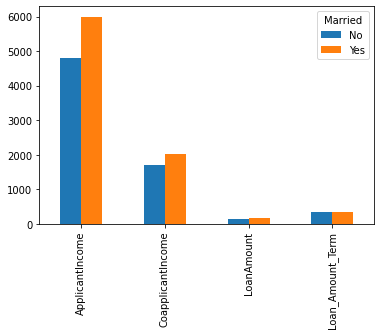

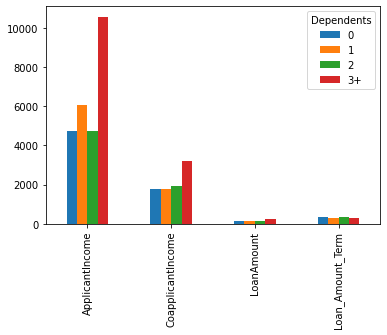

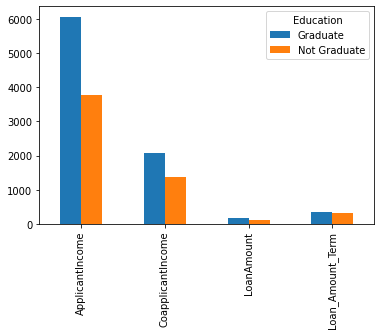

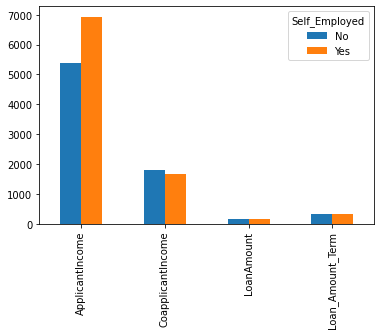

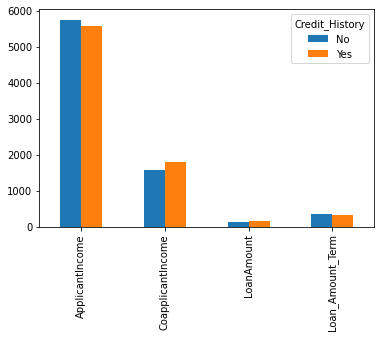

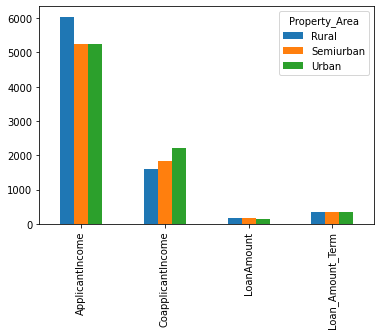

In [ ]:
for i in X.iloc[:,1:].select_dtypes('object'):
  print(pd.pivot_table(X.iloc[:,1:],columns=[i]).plot(kind='bar'),"\n\n")

AxesSubplot(0.125,0.125;0.775x0.755) 


AxesSubplot(0.125,0.125;0.775x0.755) 


AxesSubplot(0.125,0.125;0.775x0.755) 


AxesSubplot(0.125,0.125;0.775x0.755) 


AxesSubplot(0.125,0.125;0.775x0.755) 


AxesSubplot(0.125,0.125;0.775x0.755) 


AxesSubplot(0.125,0.125;0.775x0.755) 




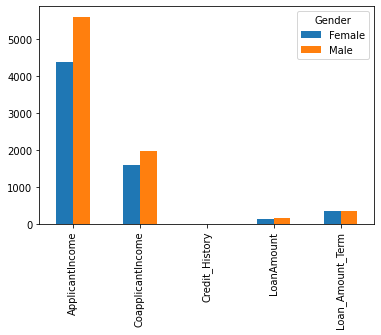

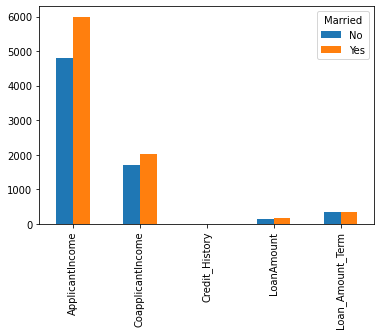

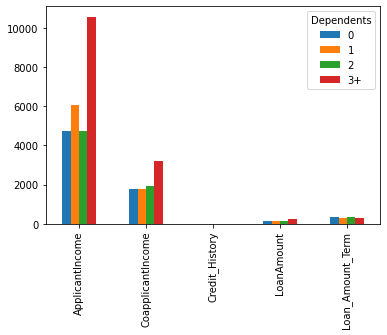

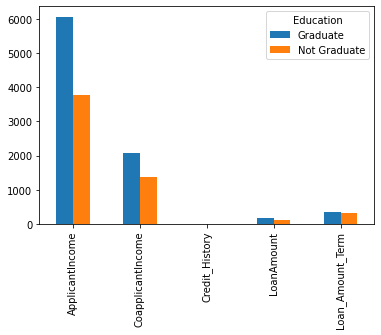

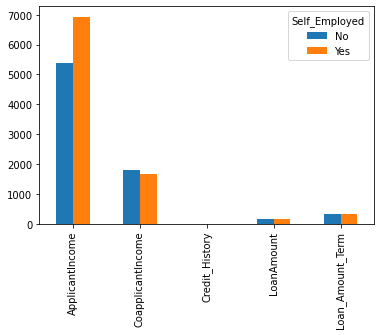

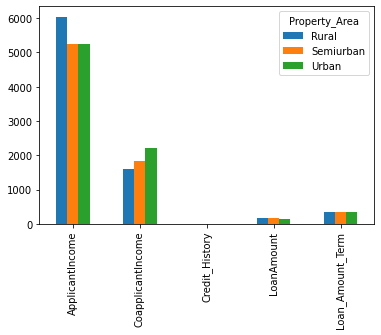

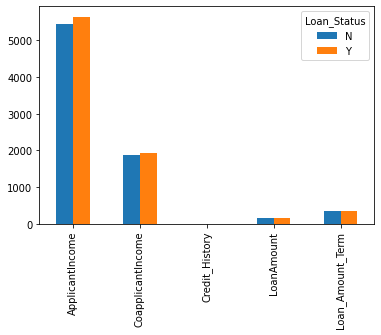

In [ ]:
for i in df.iloc[:,1:].select_dtypes('object'):
  print(pd.pivot_table(df.iloc[:,1:],columns=[i],).plot(kind='bar'),"\n\n")

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [ ]:
from sklearn.pipeline import Pipeline


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
cat_feats = X.dtypes[X.dtypes == 'object'].index.tolist()
num_feats = X.dtypes[~X.dtypes.index.isin(cat_feats)].index.tolist()

In [ ]:
num_feats

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [ ]:
cat_feats

['Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area']

In [ ]:
class DataframeFunctionTransformer():
  def __init__(self, func):
      self.func = func

  def transform(self, input_df, **transform_params):
      return self.func(input_df)

  def fit(self, X, y=None, **fit_params):
      return self

In [ ]:
def combineAndLog(dataFrame):
  dataFrame["combinedIncomesLog"] = dataFrame['ApplicantIncome'] + dataFrame['CoapplicantIncome']
  dataFrame["combinedIncomesLog"].apply(lambda x: np.log(x))
  return dataFrame

In [ ]:
def logTransformer(dataFrame):
  dataFrame['loanLog'] = dataFrame["LoanAmount"].apply(lambda x: np.log(x))
  return dataFrame

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=12)

In [ ]:
numeric_transformer = Pipeline(steps=[ ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', PowerTransformer())])

categorical_transformer = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                                          ('encoder',OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_feats),
        ('cat', categorical_transformer, cat_feats)
        ],    remainder='drop',
    verbose=True)

In [ ]:
preprocessor.fit_transform(X_train, y_train)

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s


array([[-1.24028679, -1.06409999, -1.87641935, ...,  1.        ,
         0.        ,  0.        ],
       [-0.29071898, -1.06409999, -1.19528473, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.45135659,  0.6837092 ,  1.00097993, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.84733623, -1.06409999, -1.37695752, ...,  0.        ,
         0.        ,  1.        ],
       [-0.26284516, -1.06409999, -0.49596344, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.39697213, -1.06409999, -1.1381979 , ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
newCatFeats = list(preprocessor.named_transformers_['cat']['encoder'].get_feature_names(cat_feats))

In [ ]:
labels = np.concatenate([num_feats, newCatFeats])

In [ ]:
num_feats

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [ ]:
X = pd.DataFrame(preprocessor.fit_transform(X_train), columns = labels)

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s


In [ ]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_No,Credit_History_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-1.240287,-1.064100,-1.876419,0.102743,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,-0.290719,-1.064100,-1.195285,-2.321825,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.451357,0.683709,1.000980,0.102743,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.199282,-1.064100,-0.080282,0.102743,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,-0.226485,1.065150,0.461121,0.102743,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0.652907,-1.064100,0.293255,0.102743,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
192,0.523967,0.916459,0.576850,0.102743,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
193,-0.847336,-1.064100,-1.376958,0.102743,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
194,-0.262845,-1.064100,-0.495963,0.102743,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

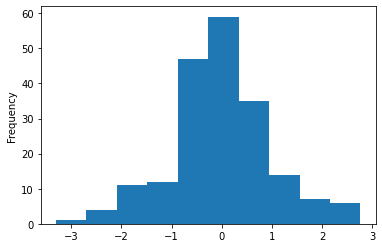

In [ ]:
X.LoanAmount.plot(kind='hist')

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


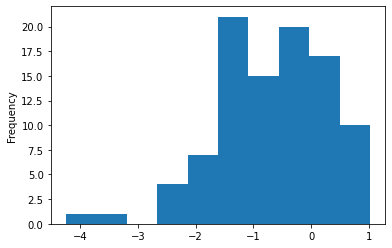

In [ ]:
X["LoanAmountLog"] = np.log(X["LoanAmount"].astype('float'))
X["LoanAmountLog"].plot(kind='hist')

Combine both incomes as total income and take a log transformation of the same.

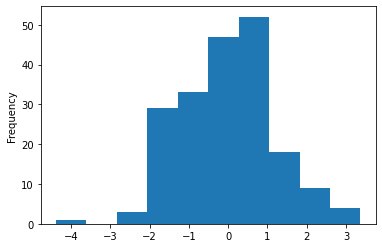

In [ ]:
X["combinedIncomes"] = X['ApplicantIncome'] + X['CoapplicantIncome']
X.combinedIncomes.plot(kind='hist')


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


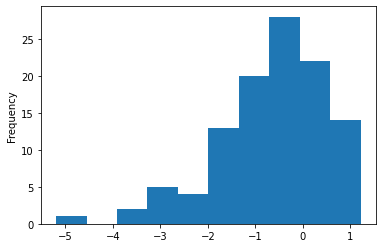

In [ ]:
X["combinedIncomesLog"] = np.log(X["combinedIncomes"])
X.combinedIncomesLog.plot(kind='hist')

## 4. Building a Predictive Model

In [ ]:
import lightgbm
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from lightgbm import LGBMClassifier

In [ ]:
model_names = ["RandomForestClassifier", "ExtraTreesClassifier", "DecisionTreeClassifier", "LGBMClassifier"]

In [ ]:
models = [RandomForestClassifier(random_state=1), ExtraTreesClassifier(random_state=1), DecisionTreeClassifier(random_state=1), LGBMClassifier(random_state=1)]

In [ ]:
zipped_combo = zip(model_names,models)

Try paramater grid search to improve the results

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,make_scorer

In [ ]:
def fit_classifier(pipeline, x_train, y_train, x_test, y_test):
    model_fit = pipeline.fit(x_train, y_train)
    y_pred = model_fit.predict(x_test)
    modelAccuracy_score = accuracy_score(y_test, y_pred)
    print('accuracy_score:',accuracy_score(y_test, y_pred))
    print('precision:', precision_score(y_test,y_pred))
    print('f1_score:', f1_score(y_test,y_pred))
    print("\n")
    return modelAccuracy_score

In [ ]:
def classifier(classifier, X_train, y_train, X_test, y_test):
    assessment = []
    for model_Name,model in classifier:
        model_test_pipe = Pipeline([ 
            ('preprocessor', preprocessor),                
            ('classifier', model)
        ])
        print('Name of model that is being tested: ', model_Name)
        modelTest = fit_classifier(model_test_pipe, X_train, y_train, X_test,y_test)
        assessment.append((model_Name,modelTest))
        
    return assessment

Name of model that is being tested:  RandomForestClassifier
accuracy_score: 0.6941176470588235
precision: 0.631578947368421
f1_score: 0.48000000000000004


Name of model that is being tested:  ExtraTreesClassifier
accuracy_score: 0.6941176470588235
precision: 0.6
f1_score: 0.5357142857142857


Name of model that is being tested:  DecisionTreeClassifier
accuracy_score: 0.7176470588235294
precision: 0.6206896551724138
f1_score: 0.6000000000000001


Name of model that is being tested:  LGBMClassifier
accuracy_score: 0.7176470588235294
precision: 0.6296296296296297
f1_score: 0.5862068965517241




In [ ]:
result = classifier(zipped_combo, X_train, y_train, X_test, y_test)

Name of model that is being tested:  RandomForestClassifier
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
accuracy_score: 0.7058823529411765
precision: 0.65
f1_score: 0.5098039215686274


Name of model that is being tested:  ExtraTreesClassifier
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
accuracy_score: 0.6941176470588235
precision: 0.6
f1_score: 0.5357142857142857


Name of model that is being tested:  DecisionTreeClassifier
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
accuracy_score: 0.6
precision: 0.4482758620689655
f1_score: 0.4333333333333333


Name of model that is being tested:  LGBMClassifier
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] .........

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gridSearchPipe = Pipeline([ 
            ('preprocessor', preprocessor),                
            ('LGBMClassifier', LGBMClassifier(random_state=1))])

In [ ]:
gridSearchPipe.steps[1][1]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
param_grid = {
    'LGBMClassifier__boosting_type': ['gbdt','dart','goss'],
    'LGBMClassifier__n_estimators': [100,200,300,400,500],
    'LGBMClassifier__learning_rate': [0.01,0.1,0.5,0.75,1]
}

In [ ]:
grid_search = GridSearchCV(gridSearchPipe, param_grid, verbose=100,scoring=make_scorer(accuracy_score), refit=True)  

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.01, LGBMClassifier__n_estimators=100 
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.01, LGBMClassifier__n_estimators=100, score=0.725, total=   0.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[CV] LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.01, LGBMClassifier__n_estimators=100 
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[CV]  LGBMClassifier__boosting_type=gbdt, LGBMClassifier__learning_rate=0.01, LGBMClassifier__n_estimators=100, score=0.718, total= 

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                 

In [ ]:
y_pred = grid_search.predict(X_test)

In [ ]:
print('accuracy_score:',accuracy_score(y_test, y_pred))
print('precision:', precision_score(y_test,y_pred))
print('f1_score:', f1_score(y_test,y_pred))

accuracy_score: 0.7176470588235294
precision: 0.64
f1_score: 0.5714285714285714


In [ ]:
finishedModel = grid_search.best_estimator_.named_steps.LGBMClassifier

In [ ]:
grid_search.best_params_

{'LGBMClassifier__boosting_type': 'dart',
 'LGBMClassifier__learning_rate': 0.5,
 'LGBMClassifier__n_estimators': 100}

In [ ]:
featureImportances = grid_search.best_estimator_.named_steps.LGBMClassifier.booster_.feature_importance()

In [ ]:
importanceDF = pd.DataFrame(featureImportances, index=labels)

In [ ]:
importanceDF

,0
ApplicantIncome,161
CoapplicantIncome,116
LoanAmount,190
Loan_Amount_Term,7
Married_No,13
Married_Yes,6
Dependents_0,15
Dependents_1,26
Dependents_2,0
Dependents_3+,0


In [ ]:
importanceDF

,0
ApplicantIncome,161
CoapplicantIncome,116
LoanAmount,190
Loan_Amount_Term,7
Married_No,13
Married_Yes,6
Dependents_0,15
Dependents_1,26
Dependents_2,0
Dependents_3+,0


In [ ]:
importanceDF

,0
ApplicantIncome,161
CoapplicantIncome,116
LoanAmount,190
Loan_Amount_Term,7
Married_No,13
Married_Yes,6
Dependents_0,15
Dependents_1,26
Dependents_2,0
Dependents_3+,0


In [ ]:
importanceDF.loc['Married'] = importanceDF[0][['Married_No','Married_Yes']].sum()
importanceDF = importanceDF.drop(['Married_No','Married_Yes'])

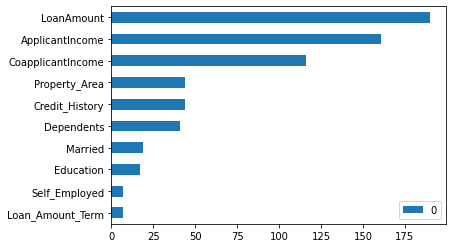

In [ ]:
importanceDF.sort_values(0) \
            .plot(kind='barh') 

In [ ]:
importanceDF.loc['Dependents'] = importanceDF[0][['Dependents_0','Dependents_1','Dependents_2','Dependents_3+']].sum()
importanceDF = importanceDF.drop(['Dependents_0','Dependents_1','Dependents_2','Dependents_3+'])

In [ ]:
importanceDF.index

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Credit_History_No',
       'Credit_History_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Married', 'Dependents'],
      dtype='object')

In [ ]:
importanceDF.loc['Education'] = importanceDF[0][['Education_Graduate','Education_Not Graduate']].sum()
importanceDF = importanceDF.drop(['Education_Graduate','Education_Not Graduate'])
importanceDF.loc['Self_Employed'] = importanceDF[0][['Self_Employed_No','Self_Employed_Yes']].sum()
importanceDF = importanceDF.drop(['Self_Employed_No','Self_Employed_Yes'])

In [ ]:
importanceDF.loc['Credit_History'] = importanceDF[0][['Credit_History_No','Credit_History_Yes']].sum()
importanceDF = importanceDF.drop(['Credit_History_No','Credit_History_Yes'])

In [ ]:
importanceDF.loc['Property_Area'] = importanceDF[0][['Property_Area_Rural','Property_Area_Semiurban','Property_Area_Urban']].sum()
importanceDF = importanceDF.drop(['Property_Area_Rural','Property_Area_Semiurban','Property_Area_Urban'])

In [ ]:
importanceDF

,0
ApplicantIncome,161
CoapplicantIncome,116
LoanAmount,190
Loan_Amount_Term,7
Married,19
Dependents,41
Education,17
Self_Employed,7
Credit_History,44
Property_Area,44


In [ ]:
importanceDF= importanceDF.rename(columns={0:'Importance'})

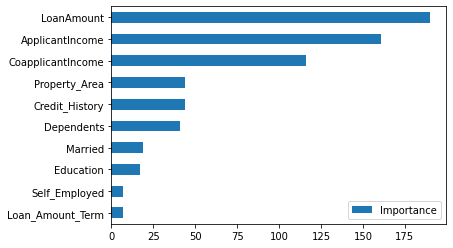

In [ ]:
importanceDF.sort_values('Importance') \
            .plot(kind='barh') 

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [ ]:
pipeline = Pipeline([ 
            ('preprocessor', preprocessor),                
            ('LGBMClassifier', LGBMClassifier(random_state=1).set_params(**grid_search.best_params_))])

In [ ]:
pipeline.fit(X_train,y_train)
pipeline.predict_proba(X_test.reset_index(drop=True).head(1))[:, 1] 

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s


array([0.14320897])

In [ ]:
import pickle

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [ ]:
pickle.dump(pipeline, open( "/content/drive/MyDrive/Colab Notebooks/miniproject4.pickle", "wb" ) )

In [ ]:
grid_search.best_params_

{'LGBMClassifier__boosting_type': 'dart',
 'LGBMClassifier__learning_rate': 0.5,
 'LGBMClassifier__n_estimators': 100}

In [ ]:
X_test.reset_index(drop=True).head(1).to_json

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Not Graduate,No,3833,0.0,110.0,360.0,Yes,Rural


In [ ]:
X_test.reset_index(drop=True).loc[0].to_json()

'{"Gender":"Male","Married":"No","Dependents":"0","Education":"Not Graduate","Self_Employed":"No","ApplicantIncome":3833,"CoapplicantIncome":0.0,"LoanAmount":110.0,"Loan_Amount_Term":360.0,"Credit_History":"Yes","Property_Area":"Rural"}'

In [ ]:
pipeline.predict_proba(X_test.reset_index(drop=True).tail(12)).tolist()

[[0.5302513661808672, 0.46974863381913273],
 [0.9951446247194486, 0.004855375280551396],
 [0.2974992381242446, 0.7025007618757554],
 [0.9645219955690556, 0.03547800443094435],
 [0.43859729304798367, 0.5614027069520163],
 [0.3485043210335115, 0.6514956789664885],
 [0.873950861531277, 0.12604913846872298],
 [0.9314547312224684, 0.06854526877753163],
 [0.17631432007064507, 0.8236856799293549],
 [0.45444777915793977, 0.5455522208420602],
 [0.7342362089959218, 0.2657637910040782],
 [0.993376765744091, 0.006623234255908996]]